<h1 align=center><font size = 6>Concrete Crack Classification with Class Activation Map</font></h1>
<br>
<img src="https://raw.githubusercontent.com/doguilmak/Concrete-Crack-Classification-with-CAM/main/concrete_crack_wp.png" height=520 width=1000 alt="britannica.com">
<small>Picture Source:<a href="https://github.com/doguilmak"> Doğu İlmak Github</a>

<br>

<h2>Description</h2>
<p>The dataset contains concrete images having cracks. The data is collected from various <b>METU Campus Buildings</b>.
The dataset is divided into two as negative and positive crack images for image classification. 
Each class has 20000images with a total of 40000 images with <i>227 x 227</i> pixels with RGB channels. 
The dataset is generated from 458 high-resolution images (4032x3024 pixel) with the method proposed by Zhang et al (2016). 
High-resolution images have variance in terms of surface finish and illumination conditions. 
No data augmentation in terms of random rotation or flipping is applied.</p>

<br>

<h2>Acknowledgements</h2>
<p>This dataset has been referred from <a href="https://data.mendeley.com/datasets/5y9wdsg2zt/2">data.mendeley.com</a>. 

<i>If you use this dataset please cite: 
2018 – Özgenel, Ç.F., Gönenç Sorguç, A. “Performance Comparison of Pretrained Convolutional Neural Networks on Crack Detection in Buildings”, ISARC 2018, Berlin.</i></p>

<br>

<h2>License</h2>
<p>CC BY 4.0
The files associated with this dataset are licensed under a Creative Commons Attribution 4.0 International license.
What does this mean?

You can share, copy and modify this dataset so long as you give appropriate credit, provide a link to the CC BY license, and indicate if changes were made, but you may not do so in a way that suggests the rights holder has endorsed you or your use of the dataset. Note that further permission may be required for any content within the dataset that is identified as belonging to a third party.</p>

<br>

<h2>Objective:</h2>
<ul>
  <li>Understand the dataset & cleanup (if required).</li>
  <li>Build classification models to predict the concrete class.</li>
  <li>Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.</li>
  <li>Build class activation maps (CAM).</li>
</ul>

<br>
<h2>Keywords</h2>
<ul>
  <li>Computer Science</li>
  <li>Classification</li>
  <li>Structure</li>
  <li>Class Activation Map</li>
  <li>Neural Networks</li>
  <li>Concrete (Composite Building Material)</li>
  <li>Concrete Cracking</li>
</ul>
<br>

<h2>Objective for this Notebook</h2>

<p>Within the scope of this project, a classification model was builded whether if there is any crack or not through data obtained from <b>Middle East Technical University</b>.</p>
<div class="alert alert-block alert-info" style="margin-top: 20px">

<li><a href="https://#import">Import Libraries and Packages</a></li>
<li><a href="https://#data_preparation">Dataset Preparation</a></li>
<li><a href="https://#compile_fit">Compile and Fit the Model</a></li>
<li><a href="https://#build_cam">Building Class Activation Maps</a></li>
<li><a href="https://#make_dataframe">Make Dataframe for the Predictions</a></li>
<li><a href="https://#upload_predict">Upload and Predict Your Picture!</a></li>
<br>

<p></p>
Estimated Time Needed: <strong>30 min</strong>
</div>

In [5]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

--2022-11-14 13:48:59--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261483817 (249M) [application/zip]
Saving to: ‘concrete_data_week4.zip.1’

concrete_data_week4 100%[===================>] 249.37M  34.4MB/s    in 7.3s    

2022-11-14 13:49:07 (34.2 MB/s) - ‘concrete_data_week4.zip.1’ saved [261483817/261483817]



In [6]:
!unzip -q concrete_data_week4.zip

replace concrete_data_week4/valid/positive/16679_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

<br>
<h2 align=center id="import">Import Libraries and Packages</h2>
<p>The following are the libraries we are going to use for this lab:</p>

In [1]:
#from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D
from keras.applications.vgg16 import preprocess_input

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import cv2
import seaborn as sns

In [4]:
import os
import shutil

In [5]:
import datetime

<br>
<h2 align=center id="data_preparation">Dataset Preparation</h2>

<p>We are going to separate our dataset.</p>

In [6]:
num_classes = 2
image_resize = 224
batch_size_training = 100
batch_size_validation = 100

In [7]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1./255)

In [8]:
train_generator = data_generator.flow_from_directory(
  "concrete_data_week4/train",
  target_size=(image_resize, image_resize),
  batch_size=batch_size_training,
  class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
  "concrete_data_week4/valid",
  target_size=(image_resize, image_resize),
  batch_size=batch_size_validation,
  class_mode='categorical')

Found 30001 images belonging to 2 classes.
Found 9501 images belonging to 2 classes.


<p>Let's plot our first 4 images in the batch and print batches.</p>

In [9]:
first_batch = train_generator.next()
first_batch

(array([[[[ 2.98278451e-01,  2.75376499e-01,  2.60078460e-01],
          [ 2.94356883e-01,  2.71454930e-01,  2.56156892e-01],
          [ 2.90435314e-01,  2.67533362e-01,  2.52235293e-01],
          ...,
          [ 2.90435314e-01,  2.91062772e-01,  2.71843165e-01],
          [ 2.90435314e-01,  2.91062772e-01,  2.71843165e-01],
          [ 2.90435314e-01,  2.91062772e-01,  2.71843165e-01]],
 
         [[ 2.74749011e-01,  2.51847088e-01,  2.36549035e-01],
          [ 2.78670579e-01,  2.55768657e-01,  2.40470603e-01],
          [ 2.82592148e-01,  2.59690225e-01,  2.44392172e-01],
          ...,
          [ 2.55141169e-01,  2.55768657e-01,  2.36549035e-01],
          [ 2.55141169e-01,  2.55768657e-01,  2.36549035e-01],
          [ 2.55141169e-01,  2.55768657e-01,  2.36549035e-01]],
 
         [[ 2.66905874e-01,  2.44003937e-01,  2.28705898e-01],
          [ 2.74749011e-01,  2.51847088e-01,  2.36549035e-01],
          [ 2.86513716e-01,  2.63611794e-01,  2.48313740e-01],
          ...,
    

In [10]:
first_batch_images = train_generator.next()[0]
first_batch_images

array([[[[0.274749  , 0.24400394, 0.2522353 ],
         [0.26690587, 0.2361608 , 0.24439217],
         [0.25906274, 0.22831766, 0.23654903],
         ...,
         [0.27082744, 0.25576866, 0.2679216 ],
         [0.27082744, 0.25576866, 0.2679216 ],
         [0.27082744, 0.25576866, 0.2679216 ]],

        [[0.2629843 , 0.23223923, 0.2404706 ],
         [0.25906274, 0.22831766, 0.23654903],
         [0.25906274, 0.22831766, 0.23654903],
         ...,
         [0.27867058, 0.2636118 , 0.27576473],
         [0.27867058, 0.2636118 , 0.27576473],
         [0.27867058, 0.2636118 , 0.27576473]],

        [[0.2512196 , 0.22047453, 0.2287059 ],
         [0.25514117, 0.2243961 , 0.23262747],
         [0.2629843 , 0.23223923, 0.2404706 ],
         ...,
         [0.28259215, 0.26753336, 0.2796863 ],
         [0.28259215, 0.26753336, 0.2796863 ],
         [0.28259215, 0.26753336, 0.2796863 ]],

        ...,

        [[0.23553334, 0.23223923, 0.24439217],
         [0.24337648, 0.24008237, 0.2522353 ]

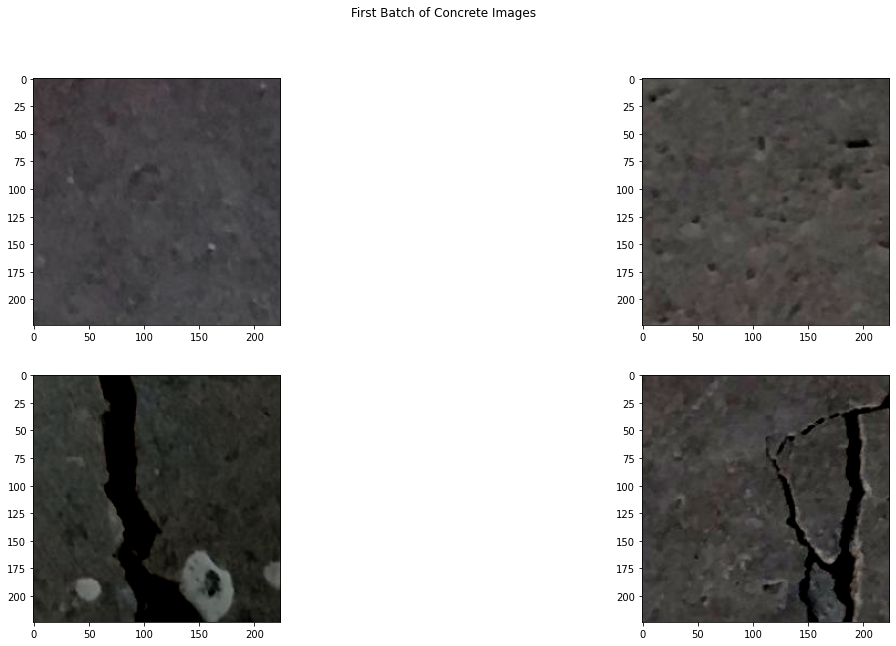

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch_images[ind]
        #image_data = first_batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()


In [12]:
second_batch_images=train_generator.next()[0]
print(second_batch_images)

[[[[ 1.53180391e-01  1.22435302e-01  9.92941260e-02]
   [ 1.61023527e-01  1.30278438e-01  1.07137263e-01]
   [ 1.64945096e-01  1.34200007e-01  1.11058831e-01]
   ...
   [ 2.31611773e-01  2.08709821e-01  1.93411782e-01]
   [ 2.31611773e-01  2.08709821e-01  1.93411782e-01]
   [ 2.31611773e-01  2.08709821e-01  1.93411782e-01]]

  [[ 1.61023527e-01  1.30278438e-01  1.07137263e-01]
   [ 1.68866664e-01  1.38121575e-01  1.14980400e-01]
   [ 1.72788233e-01  1.42043144e-01  1.18901968e-01]
   ...
   [ 2.31611773e-01  2.08709821e-01  1.93411782e-01]
   [ 2.31611773e-01  2.08709821e-01  1.93411782e-01]
   [ 2.35533342e-01  2.12631389e-01  1.97333351e-01]]

  [[ 1.72788233e-01  1.42043144e-01  1.18901968e-01]
   [ 1.76709801e-01  1.45964712e-01  1.22823536e-01]
   [ 1.84552938e-01  1.53807849e-01  1.30666673e-01]
   ...
   [ 2.35533342e-01  2.12631389e-01  1.97333351e-01]
   [ 2.35533342e-01  2.12631389e-01  1.97333351e-01]
   [ 2.35533342e-01  2.12631389e-01  1.97333351e-01]]

  ...

  [[ 4.08082

In [13]:
third_batch_images=train_generator.next()[0]
print(third_batch_images)

[[[[ 0.20416078  0.18518041  0.15811765]
   [ 0.1767098   0.15772942  0.13066667]
   [ 0.1767098   0.15772942  0.13066667]
   ...
   [ 0.0629843   0.02831765  0.00517647]
   [ 0.06690587  0.03223922  0.00909804]
   [ 0.07474902  0.04008236  0.01694118]]

  [[ 0.20416078  0.18518041  0.15811765]
   [ 0.18063137  0.16165099  0.13458824]
   [ 0.1767098   0.15772942  0.13066667]
   ...
   [ 0.0512196   0.01655295 -0.00658824]
   [ 0.05514117  0.02047451 -0.00266667]
   [ 0.0629843   0.02831765  0.00517647]]

  [[ 0.20023921  0.18125884  0.15419608]
   [ 0.18455294  0.16557257  0.13850981]
   [ 0.18063137  0.16165099  0.13458824]
   ...
   [ 0.05514117  0.02047451 -0.00266667]
   [ 0.05514117  0.02047451 -0.00266667]
   [ 0.05906274  0.02439608  0.0012549 ]]

  ...

  [[ 0.23553334  0.20478825  0.18164706]
   [ 0.23161177  0.20086668  0.1777255 ]
   [ 0.22376862  0.19302355  0.16988236]
   ...
   [ 0.2904353   0.25576866  0.23262747]
   [ 0.25514117  0.22047453  0.19733335]
   [ 0.2276902  

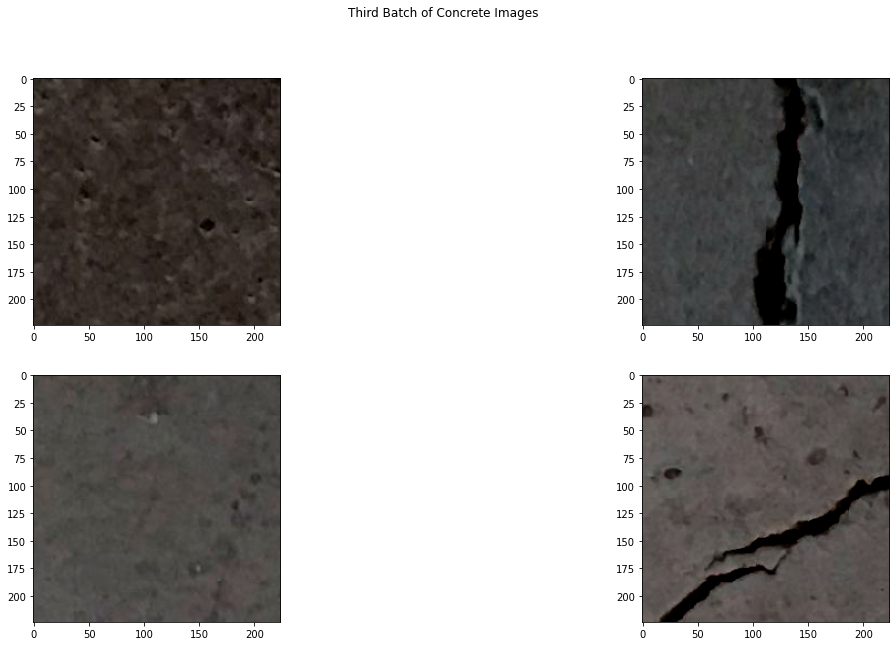

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = third_batch_images[ind]
        #image_data = third_batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('Third Batch of Concrete Images') 
plt.show()

In [15]:
fourth_batch_labels=train_generator.next()[1]
print("Negative (no cracks): ", sum(fourth_batch_labels[:, 0:1]))
print("Positive (with cracks): ", sum(fourth_batch_labels[:, 1:2]))
print(fourth_batch_labels)
print(len(fourth_batch_labels))

Negative (no cracks):  [49.]
Positive (with cracks):  [51.]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
100


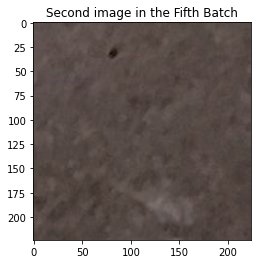

In [16]:
fifth_batch_images=train_generator.next()
plt.imshow(fifth_batch_images[0][1])
plt.title('Second image in the Fifth Batch')
plt.show()

In [17]:
fifth_batch_images[1]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

<br>
<h2 align=center id="compile_fit">Compile and Fit the Model</h2>

In [18]:
#load_model('/content/model.h5')

In [19]:
def model_block(inputs, num_classes):
 
  model = Sequential([
    
    layers.Conv2D(16, input_shape=(image_resize, image_resize, 3), kernel_size=(3,3),activation='relu',padding='same'),        
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
  
  ])
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=tf.keras.optimizers.RMSprop(lr=0.001))
  model.summary()
  
  return model


In [20]:
model = model_block(224, 2) # 224x224 as pixels and 2 as crack classes

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [22]:
num_epochs = 2
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/2
301/301 [==============================] - 1957s 7s/step - loss: 0.1612 - accuracy: 0.9581 - val_loss: 0.0631 - val_accuracy: 0.9851
Epoch 2/2
301/301 [==============================] - 1830s 6s/step - loss: 0.0641 - accuracy: 0.9828 - val_loss: 0.0501 - val_accuracy: 0.9903


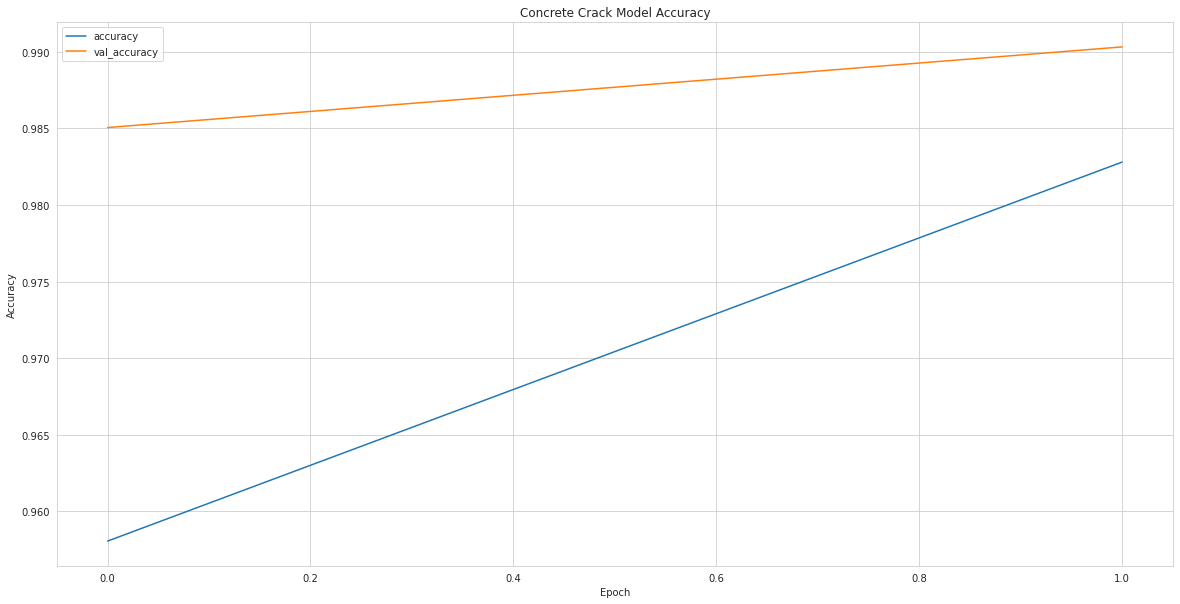

In [26]:
plt.figure(figsize=(20, 10))
sns.set_style('whitegrid')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Concrete Crack Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

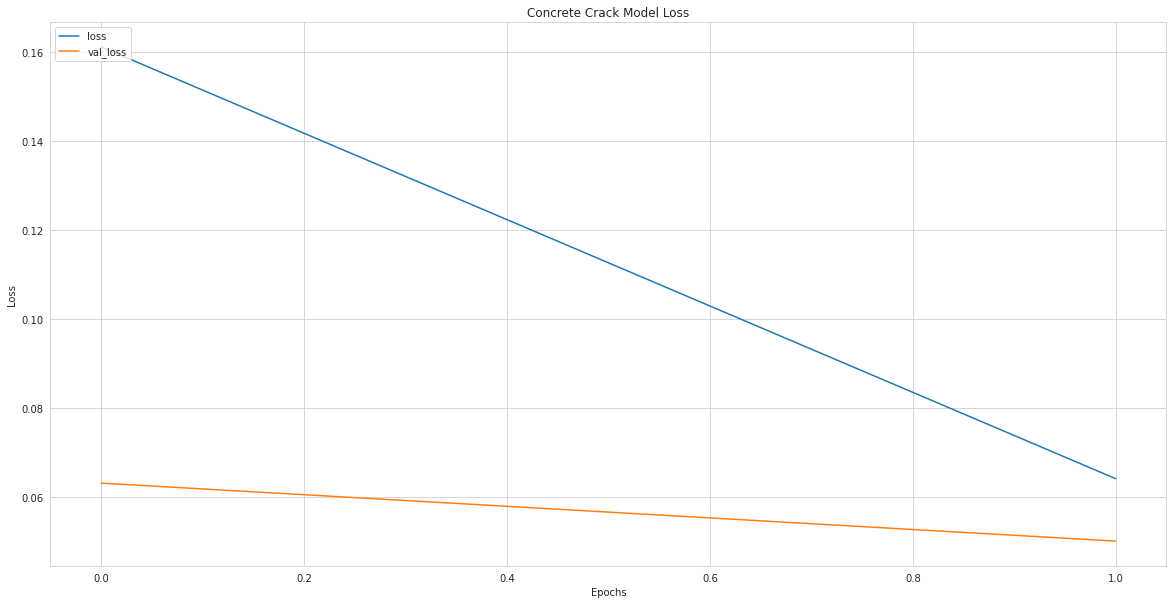

In [27]:
plt.figure(figsize=(20, 10))
sns.set_style('whitegrid')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Concrete Crack Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [28]:
model.save("model.h5")
print("Model saved!")

Model saved!


<br>
<h2 align=center id="build_cam">Building Class Activation Maps</h2>

In [32]:
# select all the layers for which you want to visualize the outputs and store it in a list
outputs = [layer.output for layer in model.layers[1:9]]

# Define a new model that generates the above output
vis_model = Model(model.input, outputs)

# store the layer names we are interested in
layer_names = []
for layer in outputs:
    layer_names.append(layer.name.split("/")[0])

    
print("Layers that will be used for visualization: ")
print(layer_names)

Layers that will be used for visualization: 
['max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'global_average_pooling2d', 'dense']


In [33]:
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

cam_model  = Model(inputs=model.input, outputs=(model.layers[-3].output,model.layers[-1].output))
cam_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1849

In [34]:
class_mapping = train_generator.class_indices
class_mapping

{'negative': 0, 'positive': 1}

In [35]:
def show_cam(image_value, features, results):
  '''
  Displays the class activation map of an image

  Args:
    image_value (tensor) -- preprocessed input image with size 224 x 224
    features (array) -- features of the image, shape (1, 28, 28, 128)
    results (array) -- output of the sigmoid layer
  '''

  # there is only one image in the batch so we index at `0`
  features_for_img = features[0]
  prediction = results[0]

  # there is only one unit in the output so we get the weights connected to it
  class_activation_weights = gap_weights[:,0]

  # upsample to the image size
  class_activation_features = sp.ndimage.zoom(features_for_img, (224/28, 224/28, 1), order=2)
  
  # compute the intensity of each feature in the CAM
  cam_output  = np.dot(class_activation_features,class_activation_weights)

  # visualize the results
  print(f'Output \nWithout Crack Probability: {results[0][0]} \nCrack Probability: {results[0][1]}')
  plt.figure(figsize=(8, 8))
  plt.imshow(cam_output, cmap='jet', alpha=0.5)
  plt.imshow(tf.squeeze(image_value), alpha=0.5)
  plt.show()
  

In [36]:
def convert_and_classify(image):

  # load the image
  img = cv2.imread(image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # preprocess the image before feeding it to the model
  img = cv2.resize(img, (224, 224)) / 255.0

  # add a batch dimension because the model expects it
  tensor_image = np.expand_dims(img, axis=0)

  # get the features and prediction
  features,results = cam_model.predict(tensor_image)
  
  # generate the CAM
  show_cam(tensor_image, features, results)

1/1 [==============================] - 0s 157ms/step
Output 
Without Crack Probability: 0.9977641105651855 
Crack Probability: 0.002235940657556057


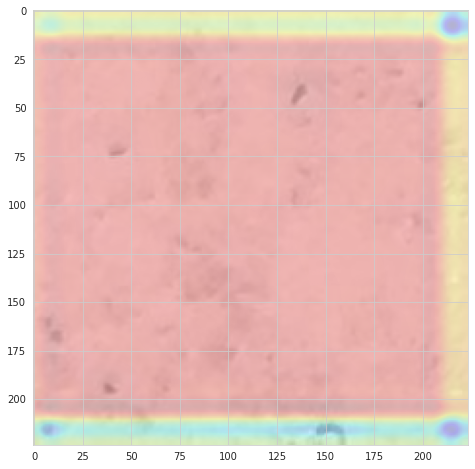

In [37]:
convert_and_classify('/content/concrete_data_week4/test/negative/19751.jpg')

1/1 [==============================] - 0s 37ms/step
Output 
Without Crack Probability: 0.13194620609283447 
Crack Probability: 0.8680537939071655


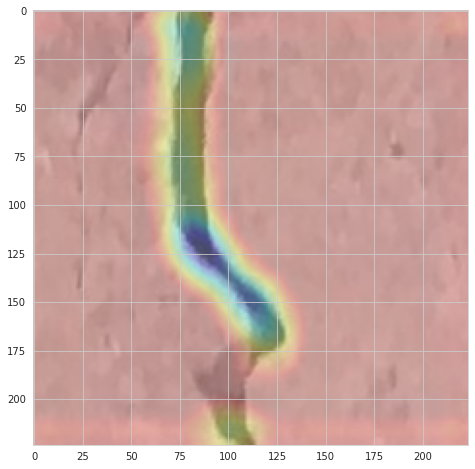

In [38]:
convert_and_classify('/content/concrete_data_week4/test/positive/19751.jpg')

<br>
<h2 align=center id="make_dataframe">Make Dataframe for the Predictions</h2>

In [39]:
test_generator = data_generator.flow_from_directory(
  '/content/concrete_data_week4/test',
  target_size=(image_resize, image_resize),
  shuffle=False,
  class_mode='categorical')

Found 500 images belonging to 2 classes.


In [40]:
filenames=test_generator.filenames

In [41]:
pred=model.predict_generator(test_generator, steps=len(test_generator), verbose=1).round(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


16/16 [==============================] - 11s 650ms/step


In [43]:
filenames_df = pd.DataFrame(filenames, columns=['File Path'])
pred_df = pd.DataFrame(pred, columns=['Without Crack Probability', 'Crack Probability'])
model_predictions = pd.concat([filenames_df, pred_df], axis=1)
model_predictions

,File Path,Without Crack Probability,Crack Probability
0,negative/19751.jpg,0.995,0.005
1,negative/19752.jpg,0.997,0.003
2,negative/19753.jpg,0.996,0.004
3,negative/19754.jpg,0.995,0.005
4,negative/19755.jpg,0.989,0.011
...,...,...,...
495,positive/19996.jpg,0.000,1.000
496,positive/19997.jpg,0.000,1.000
497,positive/19998.jpg,0.023,0.977
498,positive/19999.jpg,0.000,1.000


In [44]:
file_name='model_predictions.csv'
model_predictions.to_csv(file_name, sep=',', encoding='utf-8')

<br>
<h2 align=center id="upload_predict">Upload and Predict Your Picture!</h2>

Saving Dynamic-Vs-Static-Cracks.jpg to Dynamic-Vs-Static-Cracks (1).jpg
1/1 [==============================] - 0s 35ms/step
Output 
Without Crack Probability: 0.07245049625635147 
Crack Probability: 0.9275494813919067


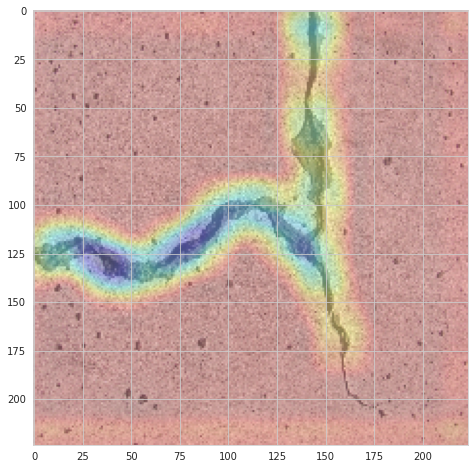

1/1 [==============================] - 0s 68ms/step
Without Crack Probability: % 0.0
Crack Probability: % 100.0


In [50]:
from google.colab import files
from keras.preprocessing import image
from numpy import asarray

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  width = 224
  height = 224
  dim = (width, height)
  path = '/content/' + fn
  img = cv2.imread(path)
  convert_and_classify(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, dim)
  x = asarray(img)
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print("Without Crack Probability: %", round(classes[0][0]*100, 2))
  print("Crack Probability: %", round(classes[0][1]*100, 2))

<h1>Contact Me</h1>
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [51]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2022-11-14 15:56:38
